In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better visuals in notebook
%matplotlib inline
sns.set(style="whitegrid")


In [3]:
df = pd.read_csv("../data/test1.csv")  # Adjust if path differs
df.head()


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",Supply Chain Emission Factors without Margins,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1


In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Industry Code                                           264 non-null    object 
 1   Industry Name                                           264 non-null    object 
 2   Substance                                               264 non-null    object 
 3   Unit                                                    264 non-null    object 
 4   Supply Chain Emission Factors without Margins           264 non-null    object 
 5   Margins of Supply Chain Emission Factors                264 non-null    float64
 6   Supply Chain Emission Factors with Margins              264 non-null    float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore of Factors without M

Industry Code                                               0
Industry Name                                               0
Substance                                                   0
Unit                                                        0
Supply Chain Emission Factors without Margins               0
Margins of Supply Chain Emission Factors                    0
Supply Chain Emission Factors with Margins                  0
Unnamed: 7                                                264
DQ ReliabilityScore of Factors without Margins              0
DQ TemporalCorrelation of Factors without Margins           0
DQ GeographicalCorrelation of Factors without Margins       0
DQ TechnologicalCorrelation of Factors without Margins      0
DQ DataCollection of Factors without Margins                0
dtype: int64

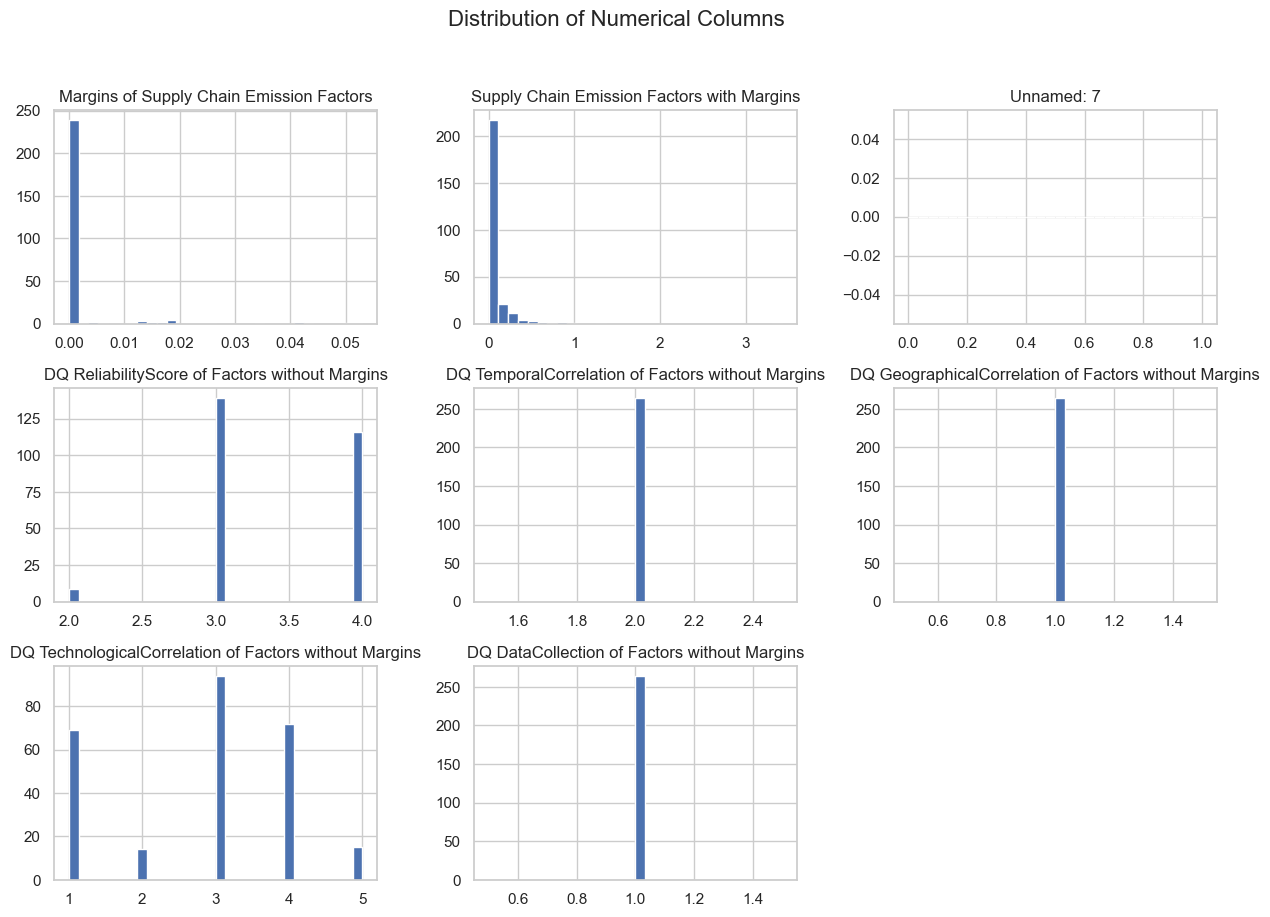

In [5]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Columns", fontsize=16)
plt.show()


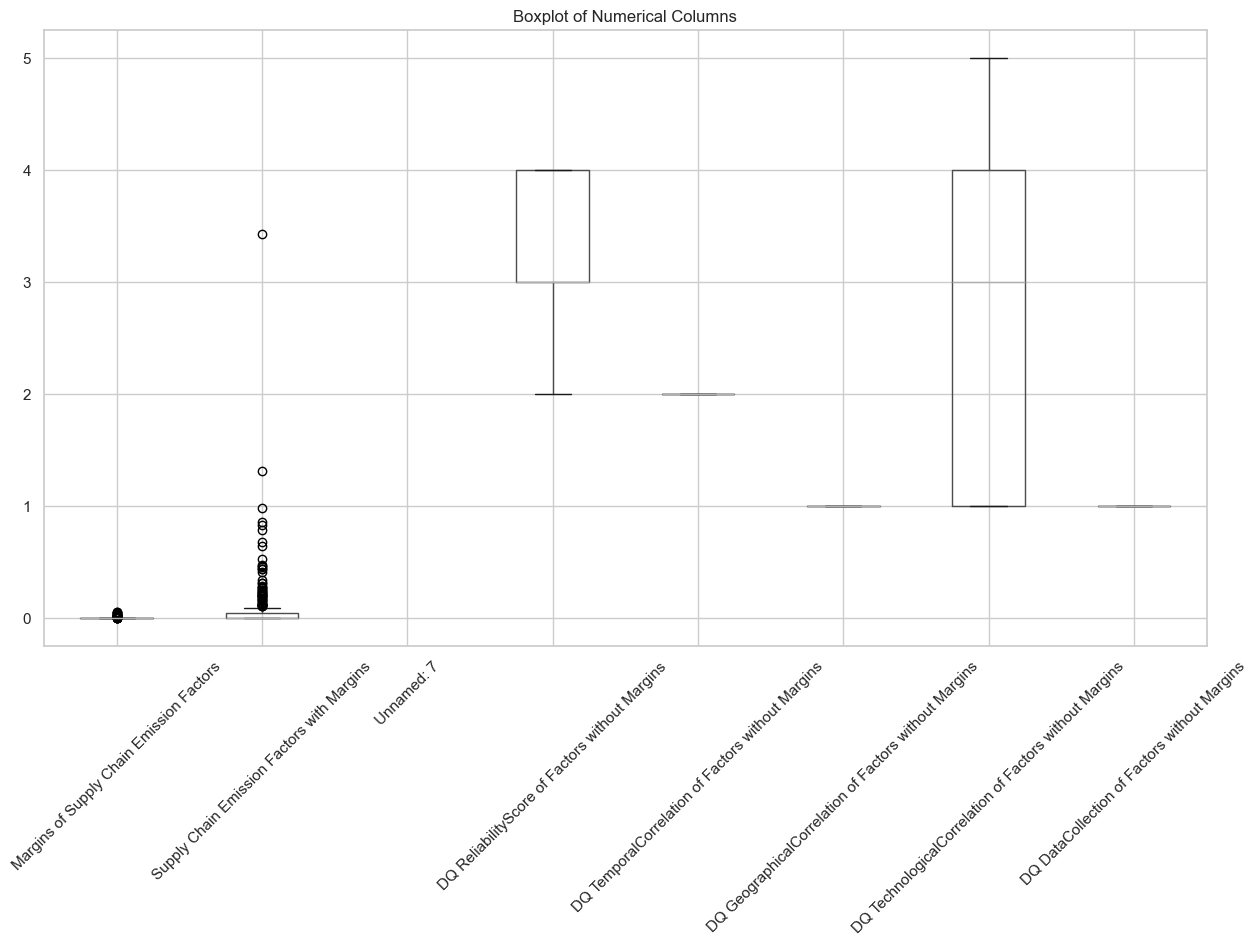

In [6]:
numeric_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title("Boxplot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()


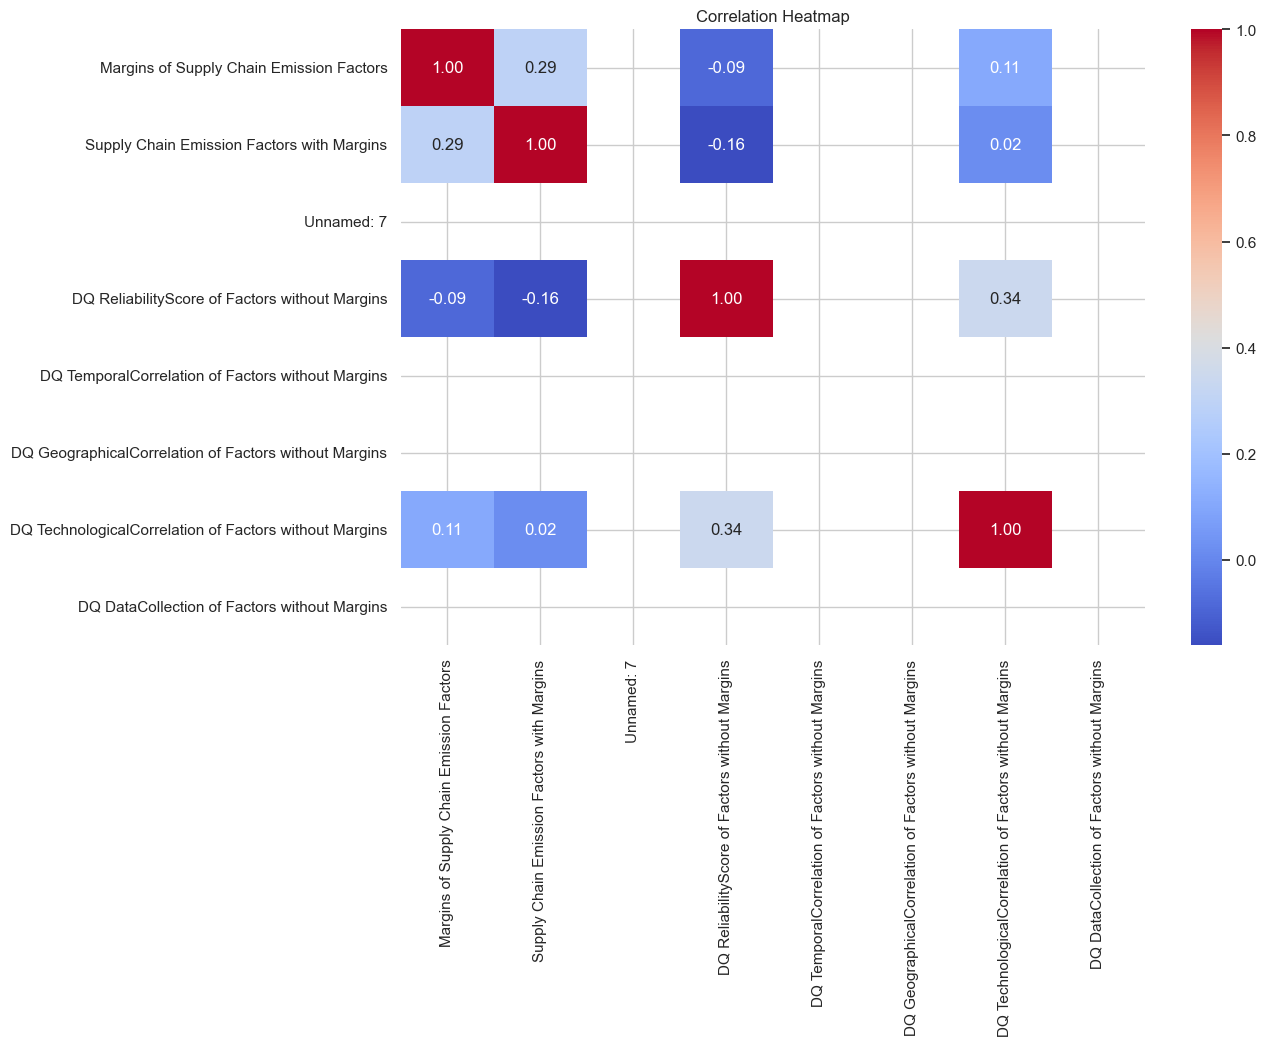

In [8]:
# Calculate the correlation matrix using only numeric columns
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_16804\739629507.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Industry Name', y='Supply Chain Emission Factors with Margins', palette="viridis")


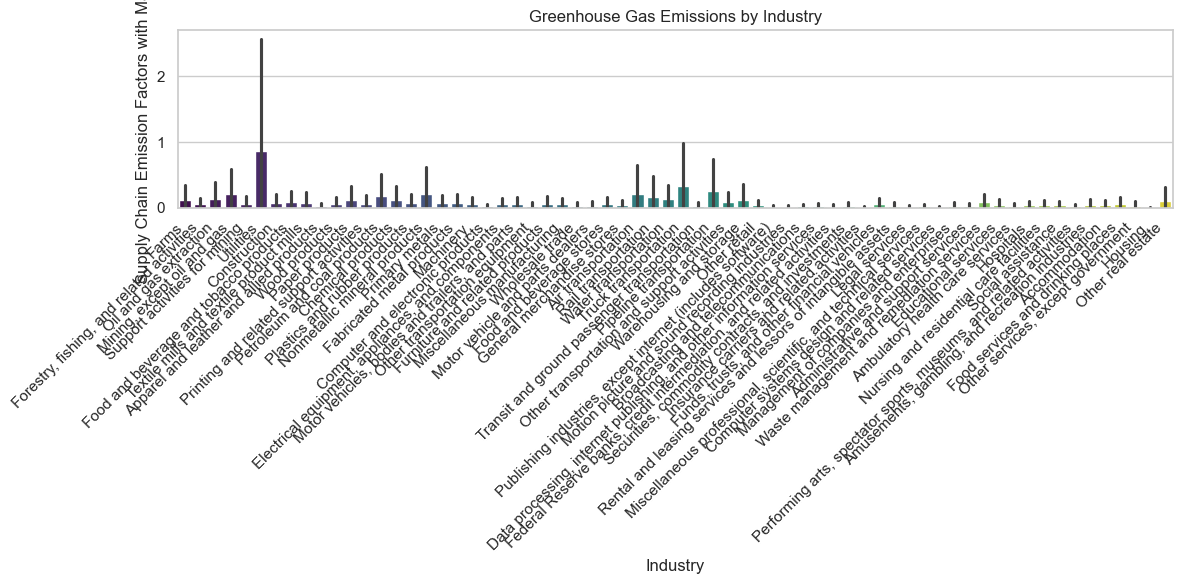

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Industry Name', y='Supply Chain Emission Factors with Margins', palette="viridis")
plt.title("Greenhouse Gas Emissions by Industry")
plt.xlabel("Industry")
plt.ylabel("Supply Chain Emission Factors with Margins")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


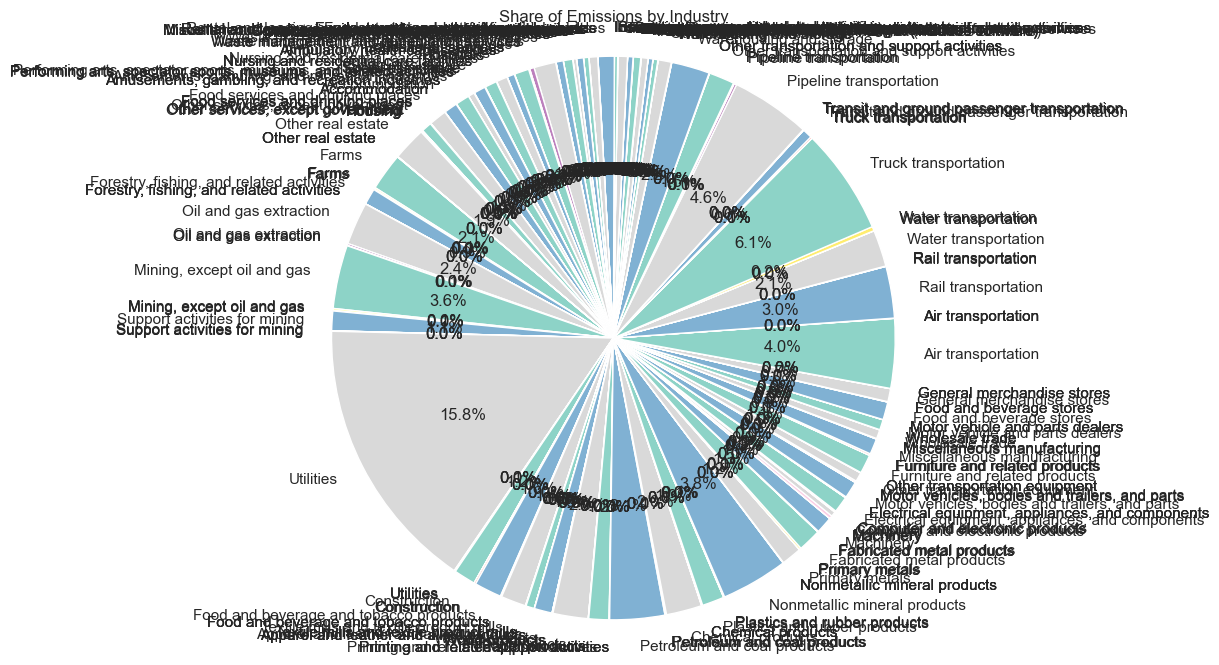

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(df['Supply Chain Emission Factors with Margins'], labels=df['Industry Name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Share of Emissions by Industry")
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()
